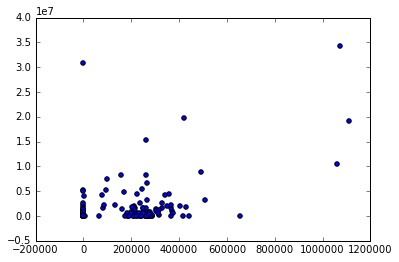

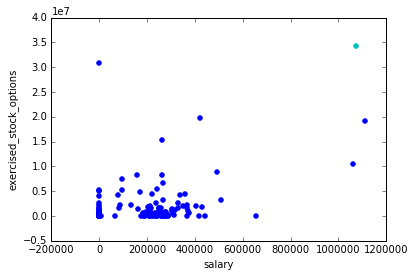

In [11]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""

%matplotlib inline


import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn import cluster



def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

clf =  cluster.KMeans(2)
clf.fit(finance_features)
pred = clf.predict(finance_features)
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
for f1, f2, f3 in finance_features:
### (as it's currently written, the line below assumes 2 features)
### for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred




### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


In [37]:
import pandas as pd
df = pd.DataFrame(data_dict).T
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [38]:
print df.exercised_stock_options.min()
print df.exercised_stock_options.max()

3285
NaN


In [39]:
import numpy as np
print df.shape[0]
df_2 = df[df.salary != 'NaN']
df_2.salary = df_2.salary.astype(int)
#print df.shape[0]

145


In [41]:
df_2.salary.min()

477

In [42]:
df_2.salary.max()

1111258